In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('../DATA/cancer_classification.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
mean radius                569 non-null float64
mean texture               569 non-null float64
mean perimeter             569 non-null float64
mean area                  569 non-null float64
mean smoothness            569 non-null float64
mean compactness           569 non-null float64
mean concavity             569 non-null float64
mean concave points        569 non-null float64
mean symmetry              569 non-null float64
mean fractal dimension     569 non-null float64
radius error               569 non-null float64
texture error              569 non-null float64
perimeter error            569 non-null float64
area error                 569 non-null float64
smoothness error           569 non-null float64
compactness error          569 non-null float64
concavity error            569 non-null float64
concave points error       569 non-null float64
symmetry error             569 

No null values 

In [5]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


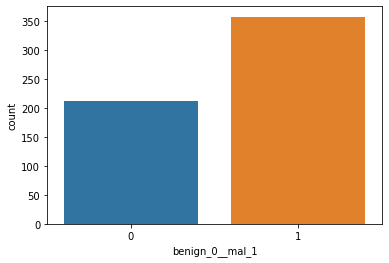

In [6]:
sns.countplot(x='benign_0__mal_1', data=df)

relatively well balanced dataset

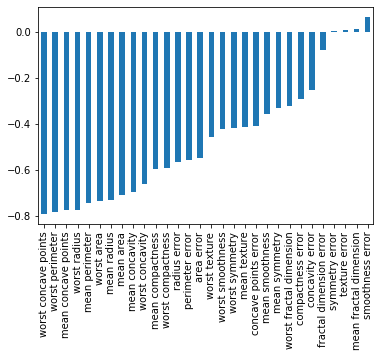

In [10]:
df.corr()['benign_0__mal_1'][:-1].sort_values().plot(kind='bar')

checking corrolation, excluding the pram itself

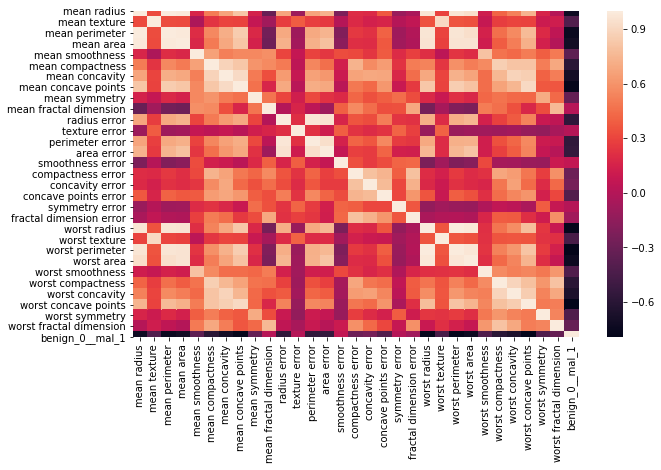

In [13]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr())

In [14]:
X = df.drop('benign_0__mal_1', axis=1).values
y= df['benign_0__mal_1'].values

In [15]:
from sklearn.model_selection import train_test_split

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

In [18]:
from sklearn.preprocessing import MinMaxScaler

In [19]:
scaler = MinMaxScaler()

In [39]:
X_train = scaler.fit_transform(X_train)

In [40]:
X_test = scaler.transform(X_test)

not fitting to test set to prevent data leakage

In [41]:
import tensorflow as tf

In [42]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation

In [43]:
X_train.shape

(426, 30)

In [44]:
model = Sequential()

model.add(Dense(30, activation='relu'))

model.add(Dense(15, activation='relu'))

#Binary classification should use sigmoid instead of relu
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy')

In [45]:
model.fit(x = X_train, y = y_train, epochs=600, validation_data=(X_test, y_test))

Train on 426 samples, validate on 143 samples
Epoch 1/600
426/426 [==============================] - 0s 940us/sample - loss: 0.6721 - val_loss: 0.6550
Epoch 2/600
426/426 [==============================] - 0s 106us/sample - loss: 0.6462 - val_loss: 0.6247
Epoch 3/600
426/426 [==============================] - 0s 107us/sample - loss: 0.6162 - val_loss: 0.5925
Epoch 4/600
426/426 [==============================] - 0s 106us/sample - loss: 0.5788 - val_loss: 0.5436
Epoch 5/600
426/426 [==============================] - 0s 94us/sample - loss: 0.5259 - val_loss: 0.4813
Epoch 6/600
426/426 [==============================] - 0s 99us/sample - loss: 0.4798 - val_loss: 0.4339
Epoch 7/600
426/426 [==============================] - 0s 95us/sample - loss: 0.4352 - val_loss: 0.3895
Epoch 8/600
426/426 [==============================] - 0s 100us/sample - loss: 0.3952 - val_loss: 0.3509
Epoch 9/600
426/426 [==============================] - 0s 92us/sample - loss: 0.3571 - val_loss: 0.3186
Epoch 10/600


In [46]:
losses = pd.DataFrame(model.history.history)

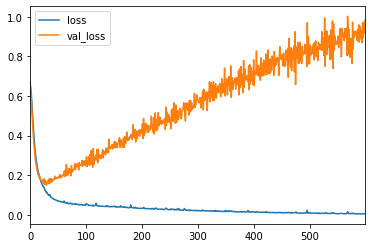

In [47]:
losses.plot()

Clearly model was overfitted

In [48]:
model = Sequential()

model.add(Dense(30, activation='relu'))

model.add(Dense(15, activation='relu'))

#Binary classification should use sigmoid instead of relu
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy')

re-defining model

In [49]:
from tensorflow.keras.callbacks import EarlyStopping

In [50]:
help(EarlyStopping)

Help on class EarlyStopping in module tensorflow.python.keras.callbacks:

class EarlyStopping(Callback)
 |  EarlyStopping(monitor='val_loss', min_delta=0, patience=0, verbose=0, mode='auto', baseline=None, restore_best_weights=False)
 |  
 |  Stop training when a monitored quantity has stopped improving.
 |  
 |  Arguments:
 |      monitor: Quantity to be monitored.
 |      min_delta: Minimum change in the monitored quantity
 |          to qualify as an improvement, i.e. an absolute
 |          change of less than min_delta, will count as no
 |          improvement.
 |      patience: Number of epochs with no improvement
 |          after which training will be stopped.
 |      verbose: verbosity mode.
 |      mode: One of `{"auto", "min", "max"}`. In `min` mode,
 |          training will stop when the quantity
 |          monitored has stopped decreasing; in `max`
 |          mode it will stop when the quantity
 |          monitored has stopped increasing; in `auto`
 |          mode, t

In [52]:
early_stop = EarlyStopping(monitor='val_loss',mode='min', verbose=1, patience=25)

monitoring val loss in min mode to minimize val loss

In [53]:
model.fit(x = X_train, y = y_train, epochs=600, validation_data=(X_test, y_test),
         callbacks=[early_stop])

Train on 426 samples, validate on 143 samples
Epoch 1/600
426/426 [==============================] - 1s 1ms/sample - loss: 0.6761 - val_loss: 0.6509
Epoch 2/600
426/426 [==============================] - 0s 91us/sample - loss: 0.6339 - val_loss: 0.6124
Epoch 3/600
426/426 [==============================] - 0s 111us/sample - loss: 0.5975 - val_loss: 0.5735
Epoch 4/600
426/426 [==============================] - 0s 185us/sample - loss: 0.5572 - val_loss: 0.5284
Epoch 5/600
426/426 [==============================] - 0s 97us/sample - loss: 0.5158 - val_loss: 0.4817
Epoch 6/600
426/426 [==============================] - 0s 152us/sample - loss: 0.4705 - val_loss: 0.4340
Epoch 7/600
426/426 [==============================] - 0s 118us/sample - loss: 0.4225 - val_loss: 0.3889
Epoch 8/600
426/426 [==============================] - 0s 318us/sample - loss: 0.3778 - val_loss: 0.3461
Epoch 9/600
426/426 [==============================] - 0s 126us/sample - loss: 0.3397 - val_loss: 0.3110
Epoch 10/600


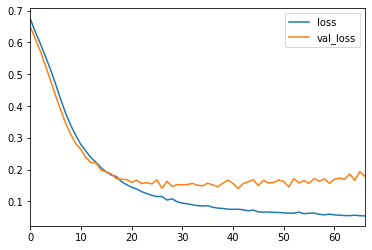

In [54]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

early stop did improve val loss

In [55]:
model = Sequential()

model.add(Dense(30, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(15, activation='relu'))
model.add(Dropout(0.5))

#Binary classification should use sigmoid instead of relu
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy')

re-defining model with dropout to possibly better model=

In [56]:
model.fit(x = X_train, y = y_train, epochs=600, validation_data=(X_test, y_test),
         callbacks=[early_stop])

Train on 426 samples, validate on 143 samples
Epoch 1/600
426/426 [==============================] - 0s 1ms/sample - loss: 0.7010 - val_loss: 0.6581
Epoch 2/600
426/426 [==============================] - 0s 121us/sample - loss: 0.6790 - val_loss: 0.6404
Epoch 3/600
426/426 [==============================] - 0s 126us/sample - loss: 0.6649 - val_loss: 0.6231
Epoch 4/600
426/426 [==============================] - 0s 108us/sample - loss: 0.6327 - val_loss: 0.6036
Epoch 5/600
426/426 [==============================] - 0s 113us/sample - loss: 0.6275 - val_loss: 0.5823
Epoch 6/600
426/426 [==============================] - 0s 101us/sample - loss: 0.6005 - val_loss: 0.5568
Epoch 7/600
426/426 [==============================] - 0s 98us/sample - loss: 0.5739 - val_loss: 0.5273
Epoch 8/600
426/426 [==============================] - 0s 115us/sample - loss: 0.5554 - val_loss: 0.5034
Epoch 9/600
426/426 [==============================] - 0s 121us/sample - loss: 0.5178 - val_loss: 0.4598
Epoch 10/600

In [57]:
model_loss = pd.DataFrame(model.history.history)

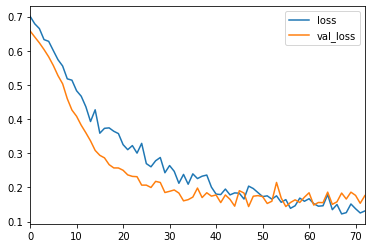

In [58]:
model_loss.plot()

more improvement seen

In [60]:
predictions = model.predict_classes(X_test)

In [61]:
from sklearn.metrics import classification_report, confusion_matrix

In [62]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.86      0.98      0.92        55
           1       0.99      0.90      0.94        88

    accuracy                           0.93       143
   macro avg       0.92      0.94      0.93       143
weighted avg       0.94      0.93      0.93       143



In [63]:
print(confusion_matrix(y_test, predictions))

[[54  1]
 [ 9 79]]


Decent outcome

In [64]:
from tensorflow.keras.models import load_model

In [65]:
model.save('Cancer_Predictor.h5')